# 펭귄 몸무게 예측 경진대회 EDA
데이콘에서 주최하는 경진대회로 펭귄의 종, 부리 길이, 성별 등의 정보들을 통해 몸무게를 예측

## 목차


1.   데이터 불러오기
2.   EDA 분석
 - 2.1. 데이터 확인
 - 2.2. 결측치 확인
 - 2.3. 상관관계 분석
 - 2.4. 수치형 데이터 분석
 - 2.5. 범주형 데이터 분석
3. 데이터 전처리




## 1. 데이터 불러오기

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

In [110]:
data_path = "/content/drive/MyDrive/colab/dacon/펭귄 몸무게 예측 경진대회/"

In [111]:
# train_data 불러오기

original_train = pd.read_csv(data_path + 'train.csv')

original_train = original_train.drop(columns=['id'])

original_train.head()

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.30515,-25.19017,5550
1,Chinstrap penguin (Pygoscelis antarctica),Dream,No,49.5,19.0,200,MALE,9.63074,-24.34684,3800
2,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.1,14.4,210,FEMALE,8.51951,-27.01854,4400
3,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,14.7,214,FEMALE,8.20106,-26.16524,4850
4,Gentoo penguin (Pygoscelis papua),Biscoe,No,49.6,16.0,225,MALE,8.38324,-26.84272,5700


In [112]:
# test_data 불러오기

original_test = pd.read_csv(data_path + 'test.csv')

original_test = original_test.drop(columns=['id'])

original_test.head()

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,52.0,20.7,210.0,MALE,9.43146,-24.68440
1,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,55.9,17.0,228.0,MALE,8.31180,-26.35425
2,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,38.9,18.8,190.0,FEMALE,8.36936,-26.11199
3,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,45.2,16.6,191.0,FEMALE,9.62357,-24.78984
4,Adelie Penguin (Pygoscelis adeliae),Biscoe,No,37.9,18.6,172.0,FEMALE,8.38404,-25.19837


## 2. EDA 분석

### 2.1. 데이터 확인

* Species: 펭귄의 종
* Island: 샘플이 수집된 섬 이름
* Clutch Completion: Full Clutch 여부(알 2개)
* Culmen Length(mm): 펭귄 옆모습 부리의 가로 길이
* Culmen Depth(mm): 펭귄 옆모습 부리의 세로 길이
* Flipper Length(mm): 펭귄의 날개 길이
* Sex: 펭귄의 성별
* Delta 15 N(o/oo): 안정 동위원소 15N:14N 비율(토양에 따라)
* Delta 13 C(o/oo): 안정 동위원소 13C:12C 비율(먹이에 따라)
* Body Mass(g): 펭귄의 몸무게

In [113]:
# train data

original_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              114 non-null    object 
 1   Island               114 non-null    object 
 2   Clutch Completion    114 non-null    object 
 3   Culmen Length (mm)   114 non-null    float64
 4   Culmen Depth (mm)    114 non-null    float64
 5   Flipper Length (mm)  114 non-null    int64  
 6   Sex                  111 non-null    object 
 7   Delta 15 N (o/oo)    111 non-null    float64
 8   Delta 13 C (o/oo)    111 non-null    float64
 9   Body Mass (g)        114 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 9.0+ KB


In [114]:
# test data

original_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              228 non-null    object 
 1   Island               228 non-null    object 
 2   Clutch Completion    228 non-null    object 
 3   Culmen Length (mm)   228 non-null    float64
 4   Culmen Depth (mm)    228 non-null    float64
 5   Flipper Length (mm)  228 non-null    float64
 6   Sex                  222 non-null    object 
 7   Delta 15 N (o/oo)    219 non-null    float64
 8   Delta 13 C (o/oo)    220 non-null    float64
dtypes: float64(5), object(4)
memory usage: 16.2+ KB


### 2.2. 결측치 확인

In [115]:
original_train.isnull().sum()

Species                0
Island                 0
Clutch Completion      0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Sex                    3
Delta 15 N (o/oo)      3
Delta 13 C (o/oo)      3
Body Mass (g)          0
dtype: int64

train data의 Sex, Delta 15 N (o/oo), Delta 13 C (o/oo) 항목에 각각 3개의 결측치 존재 



In [116]:
original_test.isnull().sum()

Species                0
Island                 0
Clutch Completion      0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Sex                    6
Delta 15 N (o/oo)      9
Delta 13 C (o/oo)      8
dtype: int64

test data의 Sex, Delta 15 N (o/oo), Delta 13 C (o/oo) 항목에 결측치 존재

### 2.3. 상관관계 분석
데이콘에서 제공해주는 베이스라인 코드 참조

In [117]:
# 상관관계 계산을 위해 카테코리형 -> 숫자형태로 변환
from sklearn.preprocessing import LabelEncoder

corr_df = original_train.copy()
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

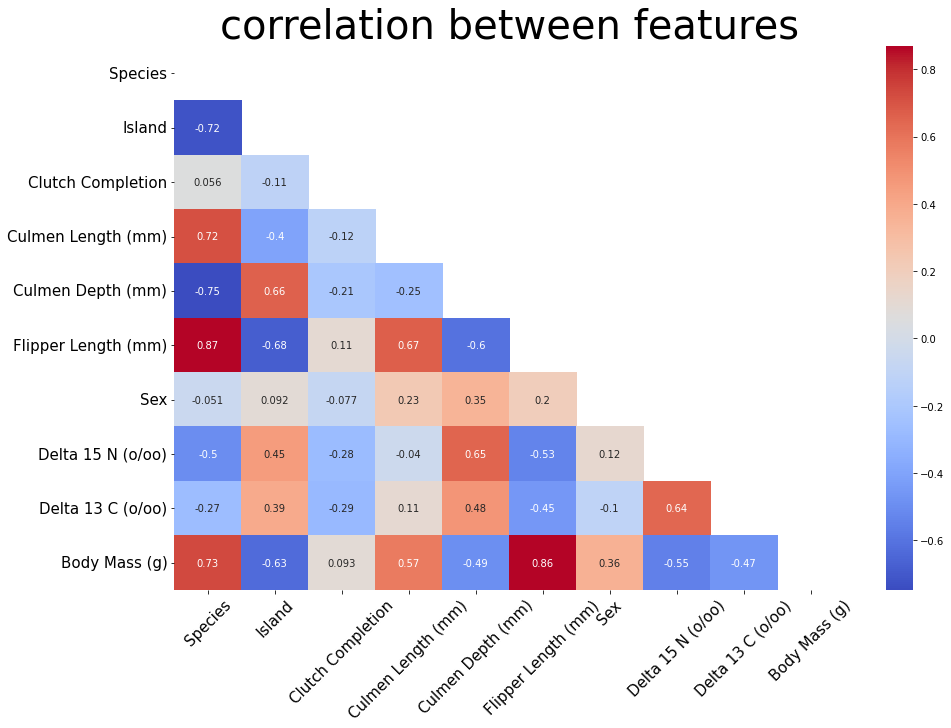

In [118]:
#상관관계 분석도
plt.figure(figsize=(15,10))

heat_table = corr_df.corr()

mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True

heatmap_ax = sns.heatmap(heat_table, annot=True, mask=mask, cmap='coolwarm')

heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)

plt.title('correlation between features', fontsize=40)
plt.show()

* Flipper Length와 Body Mass간 상관관계 높음
* Species와 Body Mass간 상관관계 높음
* Clutch Completion은 Body Mass와 상관관계 거의 없음 -> 제거하고 학습할까?
* 성별, 부리의 크기는 생각보다 상관관계가 높지 않음
* 동위 원소의 경우 먹이에 따른 것이 더 높을줄 알았는데 의외로 토양과 관련된 항목이 상관관계가 더 높음
* Flipper Length와 Species간 상관관계도 높음 -> 두 feature만 가지고 학습시켜볼 것!
* Island와 Body Mass 간 상관관계가 높은데, Island와 Species 간의 상관관계와 관련되어있을까?

### 2.4. 수치형 데이터 분석
* feature별 분포형태 시각화
* target과의 관계 시각화

In [119]:
# 수치형, 카테고리형 데이터 분리
numeric_feature = original_train.columns[(original_train.dtypes==int) | (original_train.dtypes== float)]
categorical_feature = original_train.columns[original_train.dtypes=='O']
target = 'Body Mass (g)'

print("수치형 데이터는 다음과 같습니다. \n", list(numeric_feature))
print("카테고리형 데이터는 다음과 같습니다. \n", list(categorical_feature))

수치형 데이터는 다음과 같습니다. 
 ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Body Mass (g)']
카테고리형 데이터는 다음과 같습니다. 
 ['Species', 'Island', 'Clutch Completion', 'Sex']


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

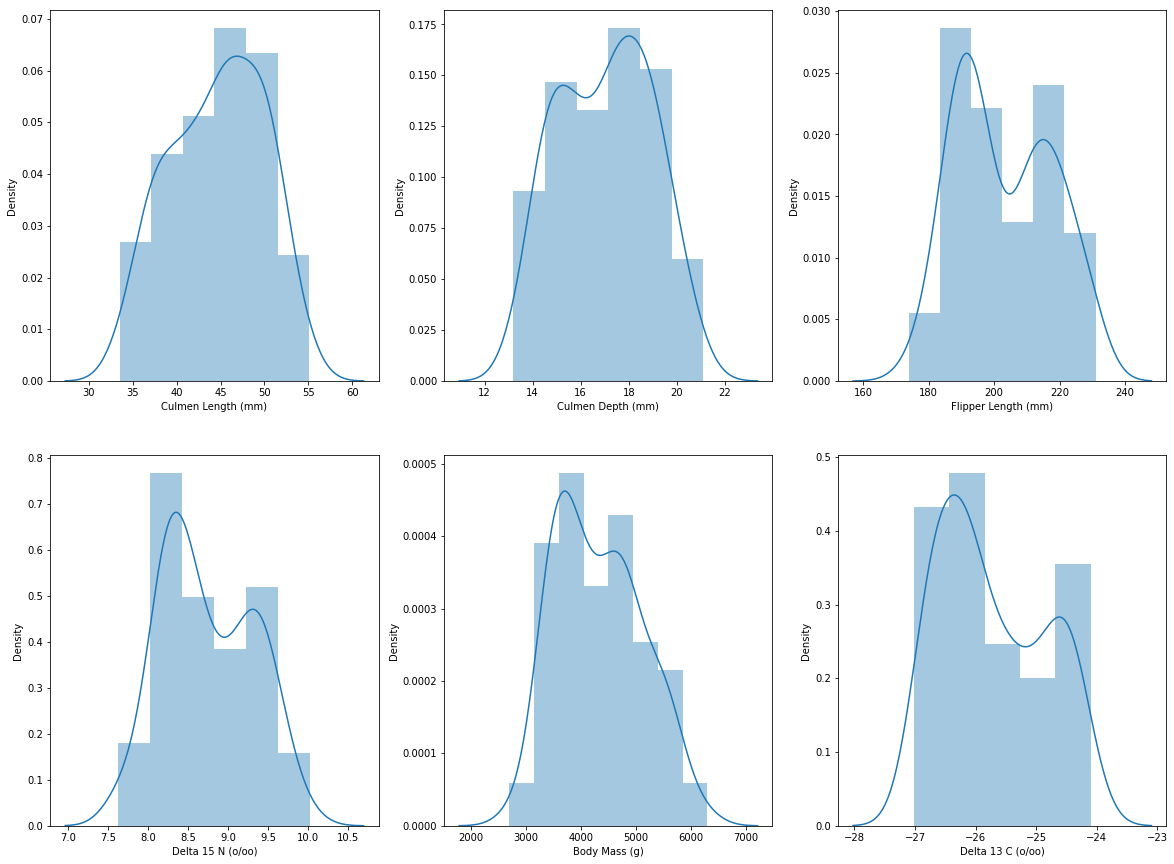

In [120]:
# 수치형 데이터 분포 시각화
f, axes = plt.subplots(2, 3, figsize=(20, 15))

for i in range(len(numeric_feature)):
  if i < 3:
    sns.distplot(original_train[numeric_feature[i]], ax=axes[0, i])
  else:
    sns.distplot(original_train[numeric_feature[i]], ax=axes[1, 3 - i])

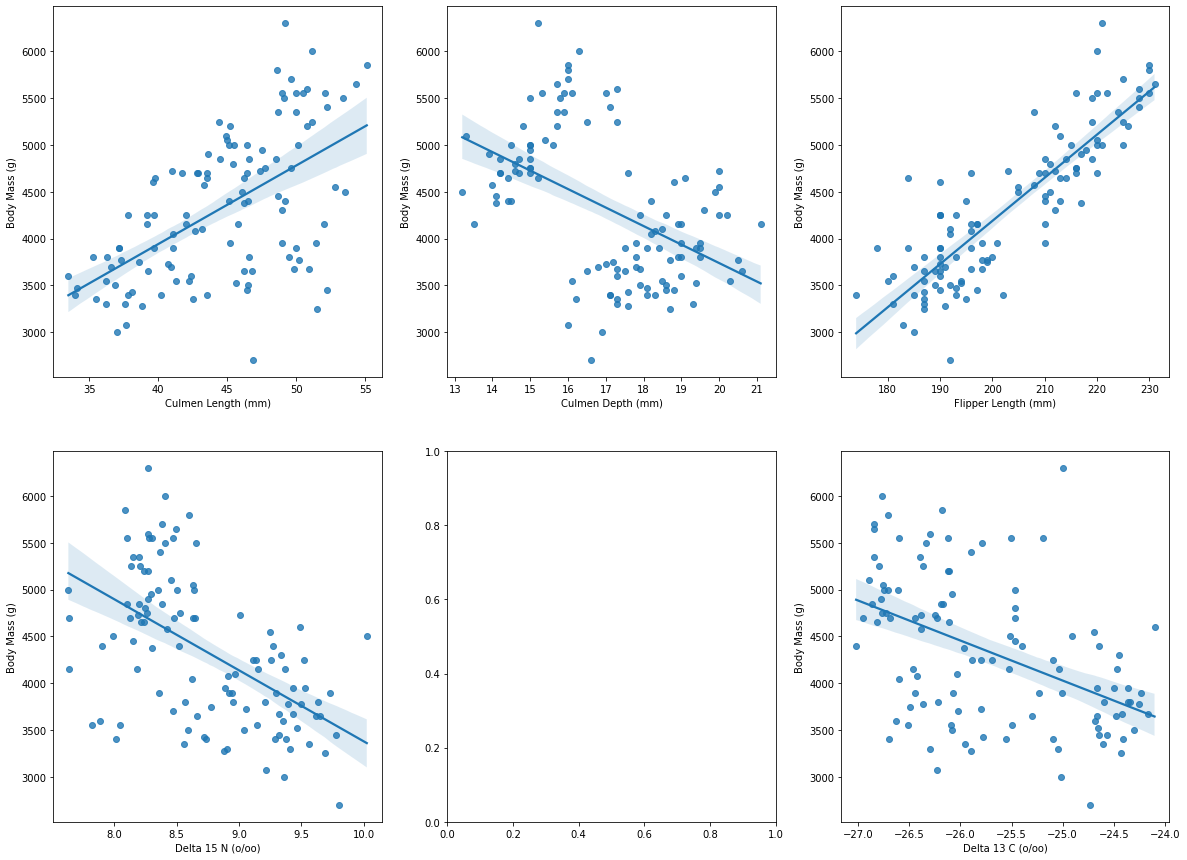

In [121]:
# target과의 관계 시각화
f, axes = plt.subplots(2, 3, figsize=(20, 15))

for i in range(len(numeric_feature) - 1):
  if i < 3:
    sns.regplot(x = numeric_feature[i], y = target, data = original_train, ax=axes[0, i])
    # sns.scatterplot(x = numeric_feature[i], y = target, data = original_train, ax=axes[0, i]) 
  else:
    sns.regplot(x = numeric_feature[i], y = target, data = original_train, ax=axes[1, 3 - i])
    # sns.scatterplot(x = numeric_feature[i], y = target, data = original_train, ax=axes[1, 3 - i]) 





* culmen length와 target간의 높은 상관관계(0.57)
* flipper length와 target간의 높은 상관관계(0.86)
* culmen depth와 상관관계 낮아보임(-0.49)
* Delta 15N과 상관관계 낮아보임(-0.55)
* Delta 13C와 상관관계 없어보임(-0.47)

### 2.5. 범주형 데이터 분석

* 범주형 데이터 분포 시각화
* target과의 관계 시각화

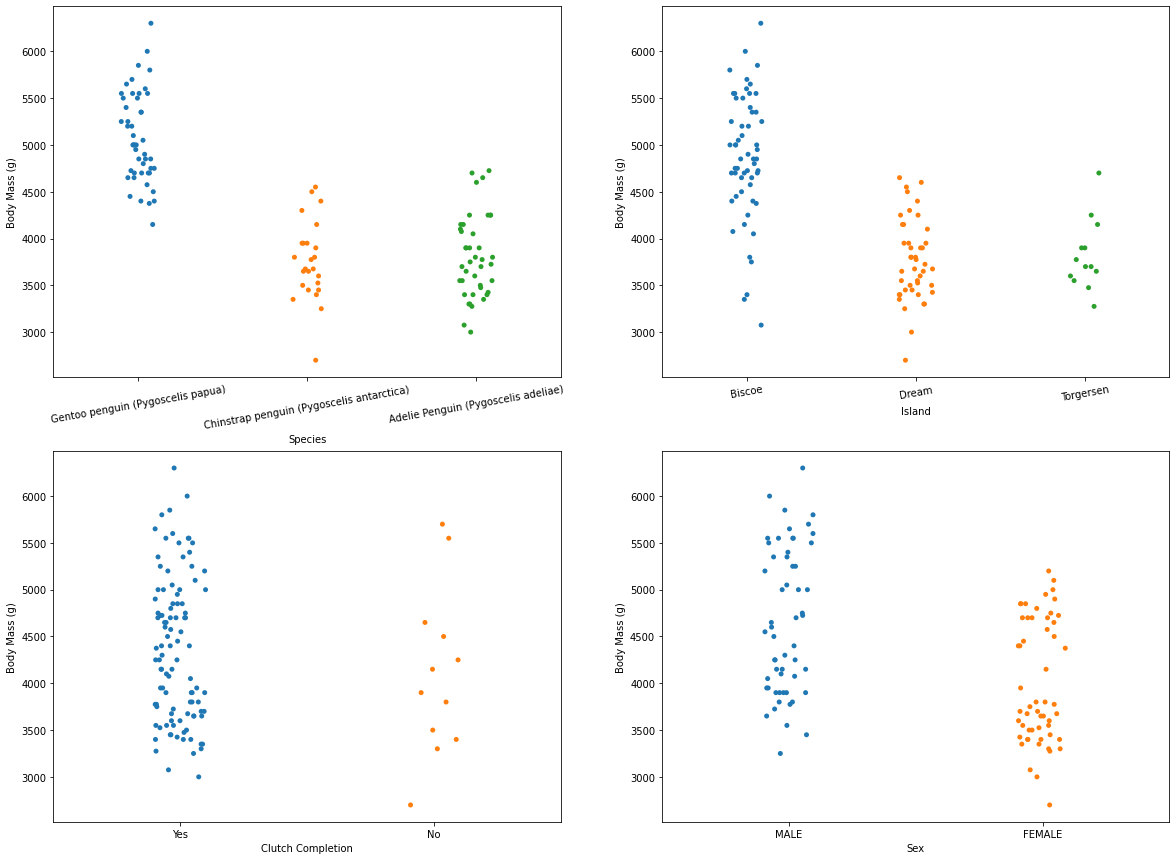

In [122]:
# target과의 관계
f, axes = plt.subplots(2, 2, figsize=(20, 15))

for i in range(len(categorical_feature)):
  if i < 2:
    g = sns.stripplot(x=categorical_feature[i], y=target, data = original_train, ax=axes[0, i])
    g.set_xticklabels(g.get_xticklabels(), rotation=10)
  else:
    sns.stripplot(x=categorical_feature[i], y=target, data = original_train, ax=axes[1, 2 - i])

* clutch completion의 경우 데이터 불균형이 심하고, target과의 상관관계가 없음
* species은 target과의 상관관계 높음(0.76)

## 3. 데이터 전처리

### 3.1. 결측치 처리
데이콘 베이스라인 코드 사용
* 카테고리형 -> 데이터 행 삭제
* 수치형 -> 평균값 채움


In [123]:
def check_missing_col(dataframe):
  missing_col = []
  counted_missing_col = 0

  for i, col in enumerate(dataframe.columns):
    missing_values = sum(dataframe[col].isna()) # 해당 col의 NaN 개수 반환
    is_missing = True if missing_values >= 1 else False

    if is_missing:
      counted_missing_col += 1
      print(f'결측치가 있는 컬럼은: {col}입니다.')
      print(f'해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다.')
      missing_col.append([col, dataframe[col].dtype])
    
  if counted_missing_col == 0:
    print('결측치가 존재하지 않습니다.')

  return missing_col

In [124]:
# 결측치 처리 함수
def handle_na(data, missing_col):
  temp = data.copy()

  for col, dtype in missing_col:
    if dtype == 'O': 
      # 카테고리형 데이터
      temp = temp.dropna(subset=[col])
    elif dtype == int or dtype == float:
      # 수치형 데이터
      temp.loc[:, col] = temp[col].fillna(temp[col].mean())
  
  return temp

In [125]:
# train_data 결측치 처리
missing_col = check_missing_col(original_train)
update_train = handle_na(original_train, missing_col)

update_train.info()

결측치가 있는 컬럼은: Sex입니다.
해당 컬럼에 총 3개의 결측치가 존재합니다.
결측치가 있는 컬럼은: Delta 15 N (o/oo)입니다.
해당 컬럼에 총 3개의 결측치가 존재합니다.
결측치가 있는 컬럼은: Delta 13 C (o/oo)입니다.
해당 컬럼에 총 3개의 결측치가 존재합니다.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 0 to 113
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              111 non-null    object 
 1   Island               111 non-null    object 
 2   Clutch Completion    111 non-null    object 
 3   Culmen Length (mm)   111 non-null    float64
 4   Culmen Depth (mm)    111 non-null    float64
 5   Flipper Length (mm)  111 non-null    int64  
 6   Sex                  111 non-null    object 
 7   Delta 15 N (o/oo)    111 non-null    float64
 8   Delta 13 C (o/oo)    111 non-null    float64
 9   Body Mass (g)        111 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 9.5+ KB


In [126]:
import sys

standard1 = 203
update_test = original_test.copy()
update_test.Sex = update_test.Sex.apply(lambda x: str(x))
for i in range(len(update_test)):
    if update_test.Sex[i] == 'nan':
        if update_test['Flipper Length (mm)'][i] >= standard1:
            update_test.Sex[i] = 'MALE'
        else:
            update_test.Sex[i] = 'FEMALE'
update_test['Delta 15 N (o/oo)'].fillna(update_test['Delta 15 N (o/oo)'].mean(), inplace=True)

update_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              228 non-null    object 
 1   Island               228 non-null    object 
 2   Clutch Completion    228 non-null    object 
 3   Culmen Length (mm)   228 non-null    float64
 4   Culmen Depth (mm)    228 non-null    float64
 5   Flipper Length (mm)  228 non-null    float64
 6   Sex                  228 non-null    object 
 7   Delta 15 N (o/oo)    228 non-null    float64
 8   Delta 13 C (o/oo)    220 non-null    float64
dtypes: float64(5), object(4)
memory usage: 16.2+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


성별에 따라 날개길이의 평균차이가 있는 것으로 확인했습니다. 날개 길이의 평균값보다 길면 수컷으로 짧으면 암컷으로 처리해줍니다. 탐색적으로 확인해보기 위해 간단하게만 처리하였습니다. 두 집단간 평균의 차이가 유의미한지 더 확실하게 알고 싶다면 t-test를 실시하여 확인해주세요. Delta_15_N의 결측치는 train데이터의 평균값으로 채워줍니다.

출처: JGBM96님 코드(https://dacon.io/competitions/official/235862/codeshare/4053?page=1&dtype=recent)

In [127]:
# # test data 결측치 처리 -> submission과 데이터셋의 개수가 같아야함으로 함부로 삭제하면 안됨ㄴ
# missing_col = check_missing_col(original_test)
# update_test = handle_na(original_test, missing_col)

# update_test.info()

### 3.2. 데이터 처리
* 필요없는 feature 삭제
* x, y로 데이터 분리

In [128]:
# x, y로 데이터 분리
train_X = update_train.copy()
train_y = update_train[target]

train_X = train_X.drop(columns=target)

In [129]:
test_X = update_test.copy()

In [130]:
# 필요없는 feature 삭제
rm_list = ['Clutch Completion', 'Delta 13 C (o/oo)']
train_X = train_X.drop(columns=rm_list)
test_X = test_X.drop(columns=rm_list)

In [131]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 0 to 113
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              111 non-null    object 
 1   Island               111 non-null    object 
 2   Culmen Length (mm)   111 non-null    float64
 3   Culmen Depth (mm)    111 non-null    float64
 4   Flipper Length (mm)  111 non-null    int64  
 5   Sex                  111 non-null    object 
 6   Delta 15 N (o/oo)    111 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 6.9+ KB


In [132]:
test_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              228 non-null    object 
 1   Island               228 non-null    object 
 2   Culmen Length (mm)   228 non-null    float64
 3   Culmen Depth (mm)    228 non-null    float64
 4   Flipper Length (mm)  228 non-null    float64
 5   Sex                  228 non-null    object 
 6   Delta 15 N (o/oo)    228 non-null    float64
dtypes: float64(4), object(3)
memory usage: 12.6+ KB


### 3.3. 범주형 데이터 전처리

In [133]:
train_X = pd.get_dummies(train_X, columns=['Species'], prefix='Species')
test_X = pd.get_dummies(test_X, columns=['Species'], prefix='Species')

train_X = pd.get_dummies(train_X, columns=['Island'], prefix='Island')
test_X = pd.get_dummies(test_X, columns=['Island'], prefix='Island')

train_X = pd.get_dummies(train_X, columns=['Sex'], prefix='Sex')
test_X = pd.get_dummies(test_X, columns=['Sex'], prefix='Sex')

In [134]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 0 to 113
Data columns (total 12 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Culmen Length (mm)                                 111 non-null    float64
 1   Culmen Depth (mm)                                  111 non-null    float64
 2   Flipper Length (mm)                                111 non-null    int64  
 3   Delta 15 N (o/oo)                                  111 non-null    float64
 4   Species_Adelie Penguin (Pygoscelis adeliae)        111 non-null    uint8  
 5   Species_Chinstrap penguin (Pygoscelis antarctica)  111 non-null    uint8  
 6   Species_Gentoo penguin (Pygoscelis papua)          111 non-null    uint8  
 7   Island_Biscoe                                      111 non-null    uint8  
 8   Island_Dream                                       111 non-null    uint8  
 9   Island_Tor

In [135]:
test_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 12 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Culmen Length (mm)                                 228 non-null    float64
 1   Culmen Depth (mm)                                  228 non-null    float64
 2   Flipper Length (mm)                                228 non-null    float64
 3   Delta 15 N (o/oo)                                  228 non-null    float64
 4   Species_Adelie Penguin (Pygoscelis adeliae)        228 non-null    uint8  
 5   Species_Chinstrap penguin (Pygoscelis antarctica)  228 non-null    uint8  
 6   Species_Gentoo penguin (Pygoscelis papua)          228 non-null    uint8  
 7   Island_Biscoe                                      228 non-null    uint8  
 8   Island_Dream                                       228 non-null    uint8  
 9   Island_Tor

## 4. train 진행
* 기본 선형회귀 모델
* LOOCV 사용한 모델

In [136]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut, cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [150]:
# # train_test_split
# x_train, x_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.2, random_state=5)

# # 선형회귀 모델 불러오기
# basic_model = LinearRegression()

# basic_model.fit(x_train, y_train)

# y_test_predict = basic_model.predict(x_test)

# rmse = mean_squared_error(y_test, y_test_predict) ** 0.5

# print(rmse)

358.8585748399737


In [148]:
# # LOOCV를 활용한 방법
# LOOCV_model = LinearRegression()
# loo = LeaveOneOut()

# # scores = cross_val_score(LOOCV_model, train_X, train_y, cv=loo, scoring="neg_root_mean_squared_error")
# # print(scores.mean())
# train_predict = cross_val_predict(LOOCV_model, train_X, train_y, cv=loo)

# rmse = mean_squared_error(train_y, train_predict) ** 0.5

# print(rmse)

313.1021089021745


In [151]:
basic_model = LinearRegression()

basic_model.fit(train_X, train_y)

LinearRegression()

## 5. 예측 진행

In [139]:
test_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 12 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Culmen Length (mm)                                 228 non-null    float64
 1   Culmen Depth (mm)                                  228 non-null    float64
 2   Flipper Length (mm)                                228 non-null    float64
 3   Delta 15 N (o/oo)                                  228 non-null    float64
 4   Species_Adelie Penguin (Pygoscelis adeliae)        228 non-null    uint8  
 5   Species_Chinstrap penguin (Pygoscelis antarctica)  228 non-null    uint8  
 6   Species_Gentoo penguin (Pygoscelis papua)          228 non-null    uint8  
 7   Island_Biscoe                                      228 non-null    uint8  
 8   Island_Dream                                       228 non-null    uint8  
 9   Island_Tor

In [152]:
y_predict = basic_model.predict(test_X)

y_predict

array([4353.05156323, 5661.6440142 , 3647.81477747, 3327.2768188 ,
       3476.66624637, 4214.32075133, 4623.17423254, 5280.97359716,
       4769.11233238, 4011.31927142, 4191.64482881, 4630.27495935,
       4714.78242044, 4726.62209906, 5162.65773703, 5267.95788318,
       4275.85026889, 3997.50687127, 3434.74012953, 3571.52250766,
       4219.55168789, 5510.3755384 , 5445.88710531, 4125.0579552 ,
       3436.92733328, 4630.76690392, 3430.91011136, 4112.2178438 ,
       4150.17983347, 4804.89730017, 3588.47875047, 4748.51969225,
       3519.79402452, 4945.65410552, 4068.12124718, 3241.31836742,
       4660.20736955, 3725.97697073, 4056.59641474, 4679.05150238,
       4066.31616826, 3645.04615439, 4055.05927015, 5420.97305201,
       3657.96219048, 4743.27796269, 3418.31091099, 4302.42846783,
       4746.46067956, 5508.46412183, 3691.13628424, 4159.71584518,
       3398.52275615, 4171.18384163, 4163.84357673, 4206.11993271,
       4758.60375076, 4157.66487736, 4760.91374337, 3555.15950

In [153]:
sub_df = pd.read_csv(data_path + "sample_submission.csv")

sub_df

,id,Body Mass (g)
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
223,223,0
224,224,0
225,225,0
226,226,0


In [154]:
submission_df = sub_df.copy()
submission_df['Body Mass (g)'] = y_predict

submission_df

,id,Body Mass (g)
0,0,4353.051563
1,1,5661.644014
2,2,3647.814777
3,3,3327.276819
4,4,3476.666246
...,...,...
223,223,4114.337229
224,224,4766.599963
225,225,4694.815093
226,226,4108.431476


In [155]:
submission_df.to_csv(data_path + 'submission.csv', index=False)